In [1]:
import xarray as xr
import os
import netCDF4
import geopandas as gpd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
import plotly.express as pl
import cftime
import cartopy.crs as ccrs
import matplotlib.pyplot as pltimport 
import numpy as np

In [2]:
path ='../data/cmip6/'
test_df=xr.open_dataset(path + 'tx90pETCCDI_mon_MPI-ESM1-2-LR_ssp585_r10i1p1f1_b1981-2010_v20190710_201501-210012_v2-0.nc')
test_xr=xr.open_dataset('../data/cmip6/tasmax_EUR-11_MPI-M-MPI-ESM-LR_historical_r2i1p1_DWD-EPISODES2018_v1-r1_mon_195101-200512.nc', decode_times=True, use_cftime=True)
test_xr

<xarray.Dataset>
Dimensions:       (time: 660, bnds: 2, rlat: 412, rlon: 424, vertices: 4)
Coordinates:
  * time          (time) object 1951-01-16 12:00:00 ... 2005-12-16 12:00:00
    lon           (rlat, rlon) float32 ...
    lat           (rlat, rlon) float32 ...
  * rlon          (rlon) float64 -28.38 -28.26 -28.16 ... 17.93 18.05 18.16
  * rlat          (rlat) float64 -23.38 -23.26 -23.16 ... 21.61 21.73 21.83
    height        float32 ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds     (time, bnds) object ...
    lon_bnds      (rlat, rlon, vertices) float32 ...
    lat_bnds      (rlat, rlon, vertices) float32 ...
    rotated_pole  int32 ...
    tasmax        (time, rlat, rlon) float32 ...
Attributes: (12/38)
    source:                         DWD-EPISODES2018
    institution:                    Deutscher Wetterdienst
    Conventions:                    CF-1.4
    contact:                        klima.episodes@dwd.de
    references:                     http://www.dwd.de/episodes
    institute_id:                   DWD
    ...                             ...
    cmor_version:                   2.9.1
    terms_of_use:                   commercial purposes - unrestricted use
    creation_date:                  2018-04-09T19:25:18Z
    tracking_id:                    a77678ad-1e44-463f-9470-a800a46ff845
    further_info_url:               http://www.dwd.de/episodes
    licence:                        CORDEX model data produced by Deutscher W...

In [3]:
df_ger = gpd.read_file(path + 'vg2500_geo84/vg2500_bld.shp')
df_ger.head

<bound method NDFrame.head of     USE  RS        RS_ALT                     GEN    SHAPE_LENG    SHAPE_AREA  \
0     2  02  020000000000                 Hamburg  1.752538e+05  7.605398e+08   
1     2  03  030000000000           Niedersachsen  2.016496e+06  4.771641e+10   
2     2  04  040000000000                  Bremen  1.549716e+05  4.054809e+08   
3     2  05  050000000000     Nordrhein-Westfalen  1.352108e+06  3.404727e+10   
4     2  06  060000000000                  Hessen  1.105093e+06  2.109232e+10   
5     2  07  070000000000         Rheinland-Pfalz  9.106504e+05  1.983491e+10   
6     2  08  080000000000       Baden-Württemberg  1.298892e+06  3.580140e+10   
7     2  09  090000000000                  Bayern  2.046039e+06  7.055007e+10   
8     2  10  100000000000                Saarland  2.829108e+05  2.578542e+09   
9     2  11  110000000000                  Berlin  1.807512e+05  8.864801e+08   
10    2  12  120000000000             Brandenburg  1.295460e+06  2.965390e+10  

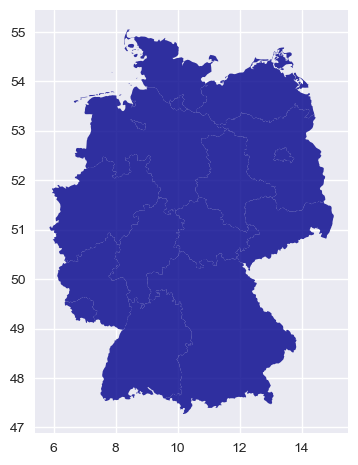

In [4]:
fig, ax = plt.subplots()

ger_plot = df_ger.plot(ax=ax, color='darkblue', alpha=0.8)

In [5]:
print(df_ger.iloc[:,3])
print(df_ger[['GEN','geometry']])

0                    Hamburg
1              Niedersachsen
2                     Bremen
3        Nordrhein-Westfalen
4                     Hessen
5            Rheinland-Pfalz
6          Baden-Württemberg
7                     Bayern
8                   Saarland
9                     Berlin
10               Brandenburg
11    Mecklenburg-Vorpommern
12                   Sachsen
13            Sachsen-Anhalt
14                 Thüringen
15        Schleswig-Holstein
Name: GEN, dtype: object
                       GEN                                           geometry
0                  Hamburg  MULTIPOLYGON (((10.19114 53.72299, 10.18210 53...
1            Niedersachsen  MULTIPOLYGON (((8.68962 53.87999, 8.69297 53.8...
2                   Bremen  MULTIPOLYGON (((8.52976 53.21640, 8.55399 53.2...
3      Nordrhein-Westfalen  POLYGON ((8.66673 52.52149, 8.70289 52.50053, ...
4                   Hessen  POLYGON ((9.50560 51.62777, 9.50842 51.62712, ...
5          Rheinland-Pfalz  POLYGON ((7.846

<Axes: >

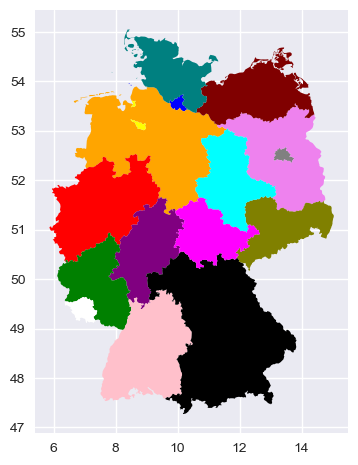

In [6]:
df_ger['color'] = ['blue', 'orange', 'yellow', 'red', 'purple', 'green', 'pink', 'black', 'white', 'grey', 'violet', 'maroon', 'olive', 'cyan', 'magenta', 'teal']
df_ger.plot(color=df_ger['color'])

In [7]:
df_ger.geometry.where(df_ger.GEN == 'Bremen').geometry.values

<GeometryArray>
[                                                                            None,
                                                                             None,
 <MULTIPOLYGON (((8.53 53.2, 8.55 53.2, 8.57 53.2, 8.58 53.2, 8.6 53.2, 8.64 ...>,
                                                                             None,
                                                                             None,
                                                                             None,
                                                                             None,
                                                                             None,
                                                                             None,
                                                                             None,
                                                                             None,
                                                                       

In [8]:
test_xr.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:       (time: 660, bnds: 2, rlat: 412, rlon: 424, vertices: 4)
Coordinates:
  * time          (time) object 1951-01-16 12:00:00 ... 2005-12-16 12:00:00
    lon           (rlat, rlon) float32 ...
    lat           (rlat, rlon) float32 ...
  * rlon          (rlon) float64 -28.38 -28.26 -28.16 ... 17.93 18.05 18.16
  * rlat          (rlat) float64 -23.38 -23.26 -23.16 ... 21.61 21.73 21.83
    height        float32 ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds     (time, bnds) object ...
    lon_bnds      (rlat, rlon, vertices) float32 ...
    lat_bnds      (rlat, rlon, vertices) float32 ...
    rotated_pole  int32 ...
    tasmax        (time, rlat, rlon) float32 ...
Attributes: (12/38)
    source:                         DWD-EPISODES2018
    institution:                    Deutscher Wetterdienst
    Conventions:                    CF-1.4
    contact:                        klima.episodes@dwd.de
 

In [11]:
test_xr['tasmax'].sel(time=cftime.DatetimeProlepticGregorian(1995, 4, 16, 0, 0, 0, 0, has_year_zero=True), )

<xarray.DataArray 'tasmax' (rlat: 412, rlon: 424)>
[174688 values with dtype=float32]
Coordinates:
    time     object 1995-04-16 00:00:00
    lon      (rlat, rlon) float32 ...
    lat      (rlat, rlon) float32 ...
  * rlon     (rlon) float64 -28.38 -28.26 -28.16 -28.05 ... 17.93 18.05 18.16
  * rlat     (rlat) float64 -23.38 -23.26 -23.16 -23.05 ... 21.61 21.73 21.83
    height   float32 ...
Attributes:
    standard_name:  air_temperature
    long_name:      Daily Maximum Near-Surface Air Temperature
    units:          K
    grid_mapping:   rotated_pole
    cell_methods:   time: maximum within days time: mean over days

#### print(test_xr['tasmax'])
print(test_xr['rlat'])

In [12]:
test_xr.time.values

array([cftime.DatetimeProlepticGregorian(1951, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeProlepticGregorian(1951, 2, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeProlepticGregorian(1951, 3, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeProlepticGregorian(1951, 4, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeProlepticGregorian(1951, 5, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeProlepticGregorian(1951, 6, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeProlepticGregorian(1951, 7, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeProlepticGregorian(1951, 8, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeProlepticGregorian(1951, 9, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeProlepticGregorian(1951, 10, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeProlepticGregorian(1951, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeProlepticGreg

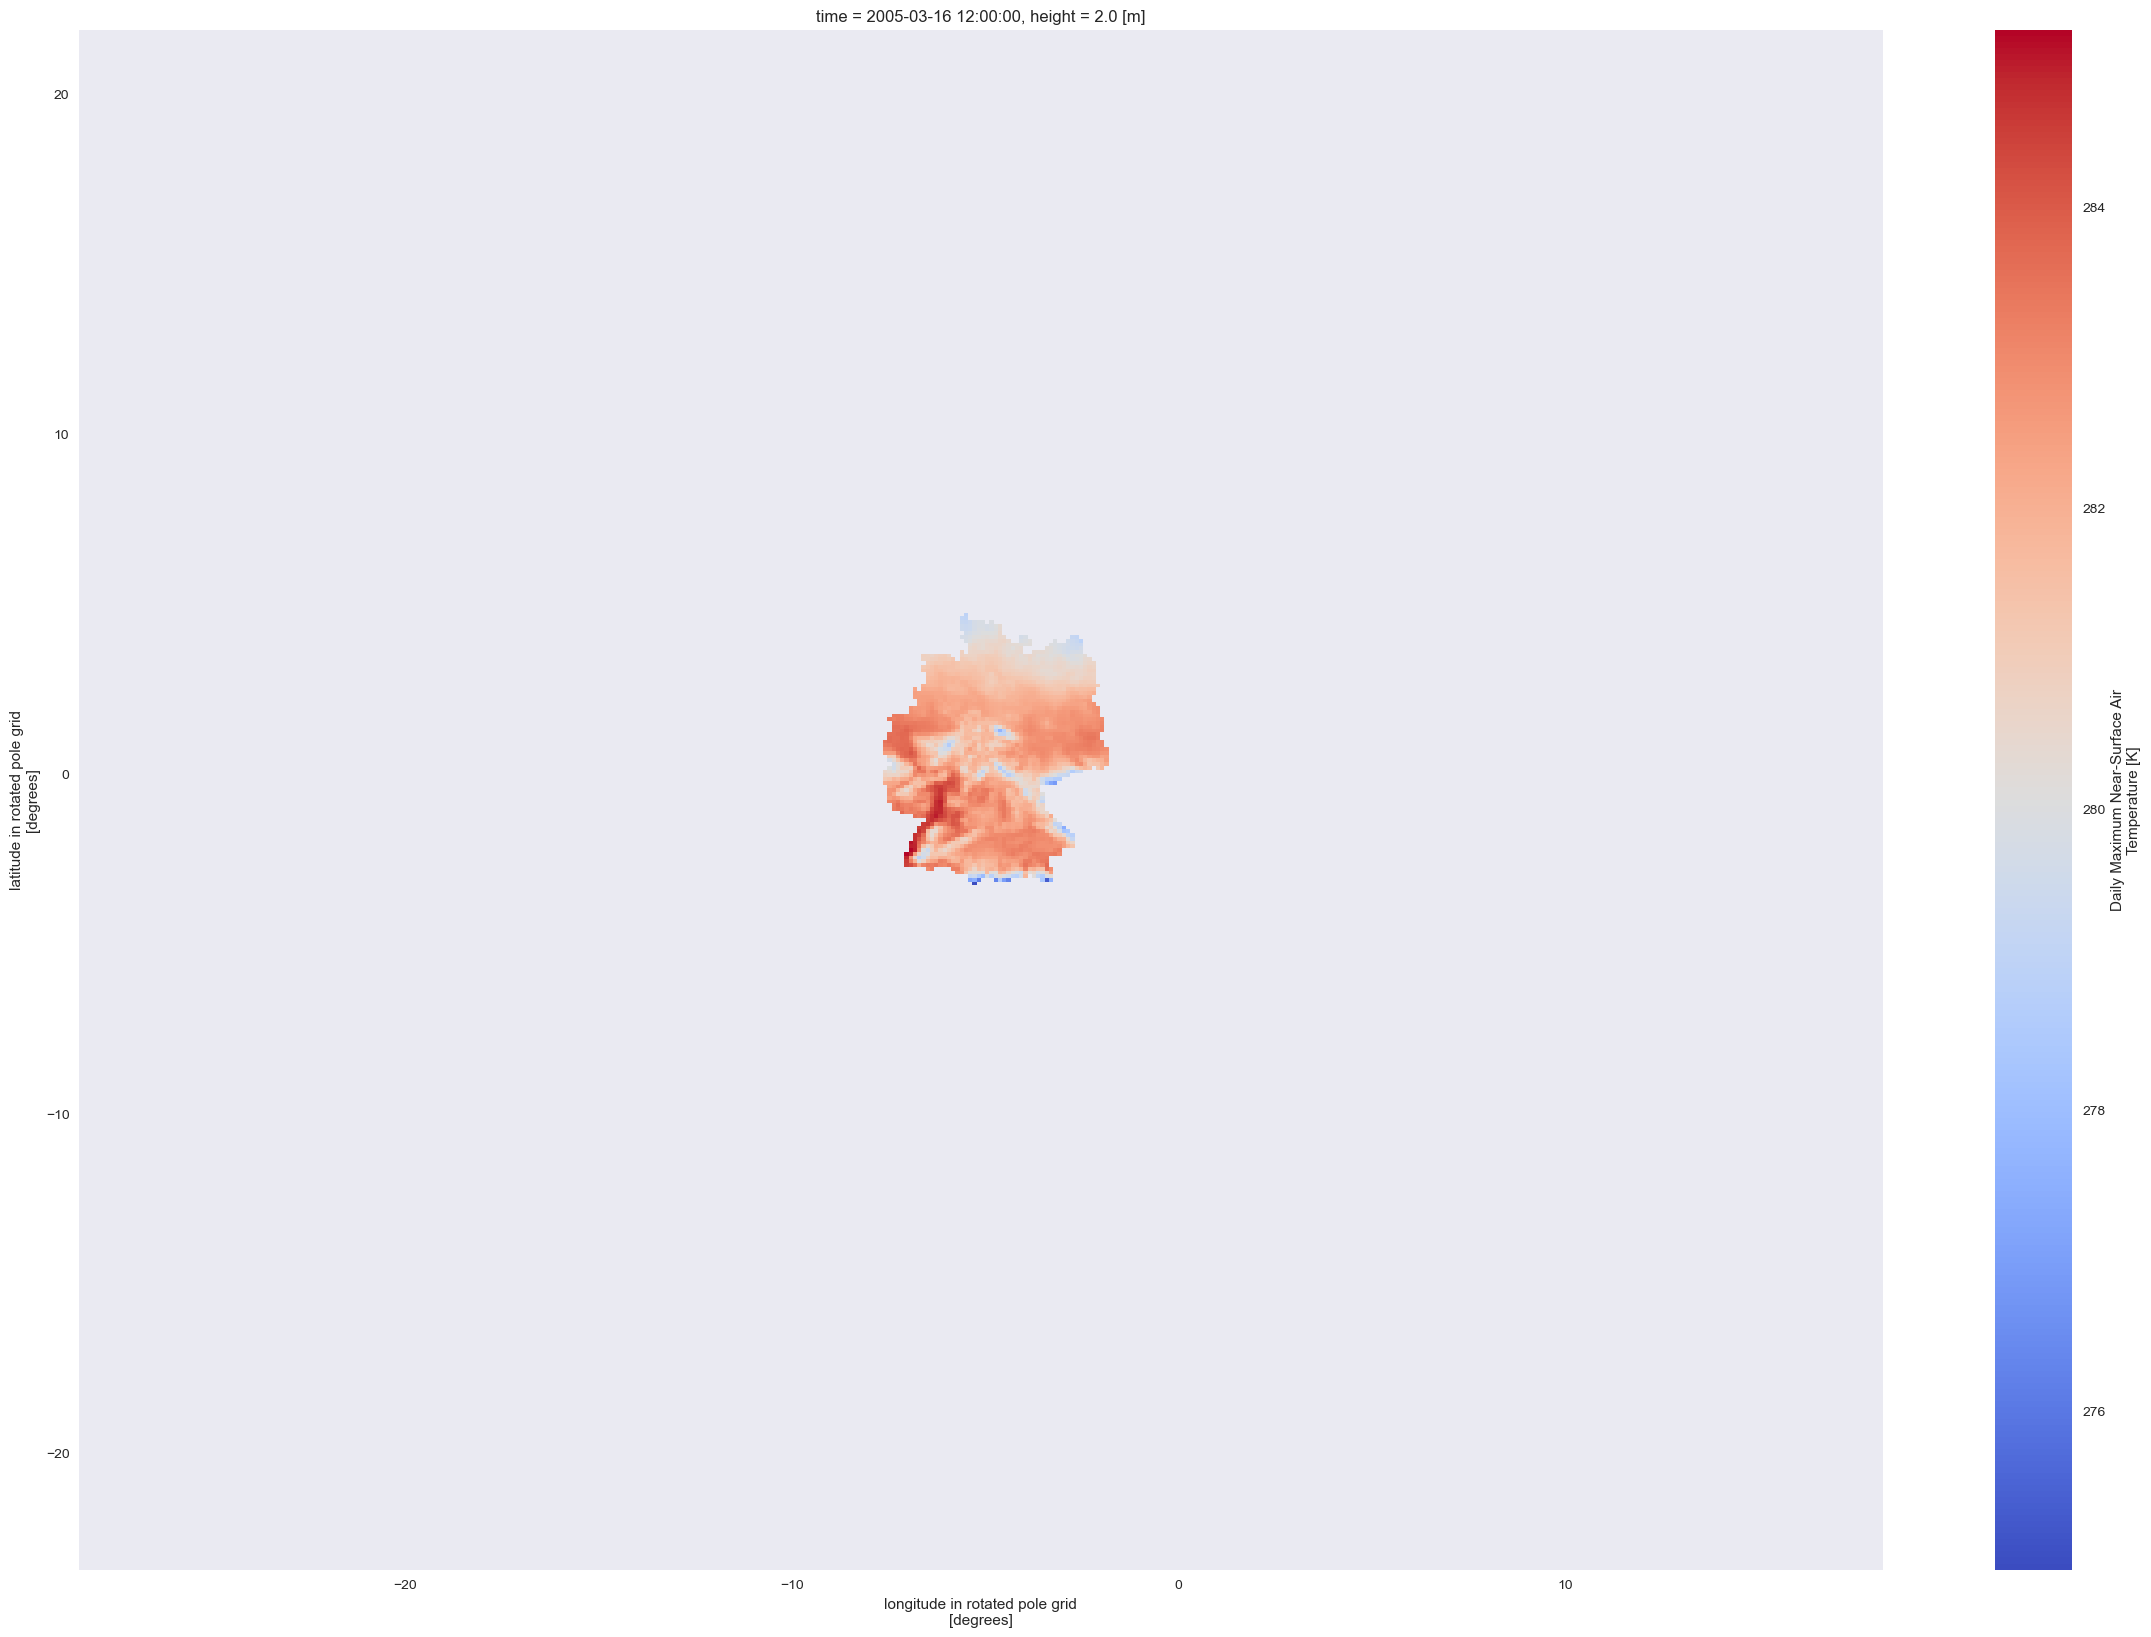

In [13]:
test_xr['tasmax'].sel(time=cftime.DatetimeProlepticGregorian(2005, 3, 16, 12, 0, 0, 0, has_year_zero=True)).plot(cmap = 'coolwarm', size=20)

In [29]:
a=test_xr.where(-10<=test_xr.rlon, drop =True).where(test_xr.rlon<=0, drop =True).where(-6<=test_xr.rlat, drop =True).where(test_xr.rlat<=8, drop =True).squeeze()

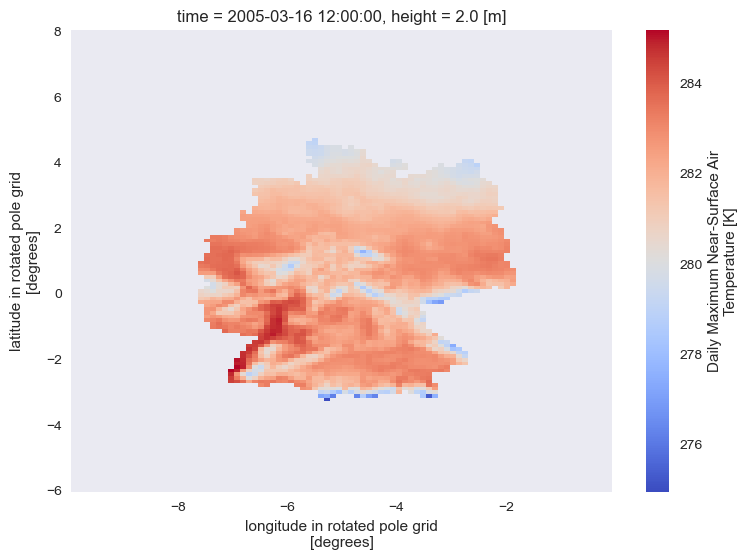

In [36]:
a['tasmax'].sel(time=cftime.DatetimeProlepticGregorian(2005, 3, 16, 12, 0, 0, 0, has_year_zero=True)).plot(cmap = 'coolwarm', size=6)

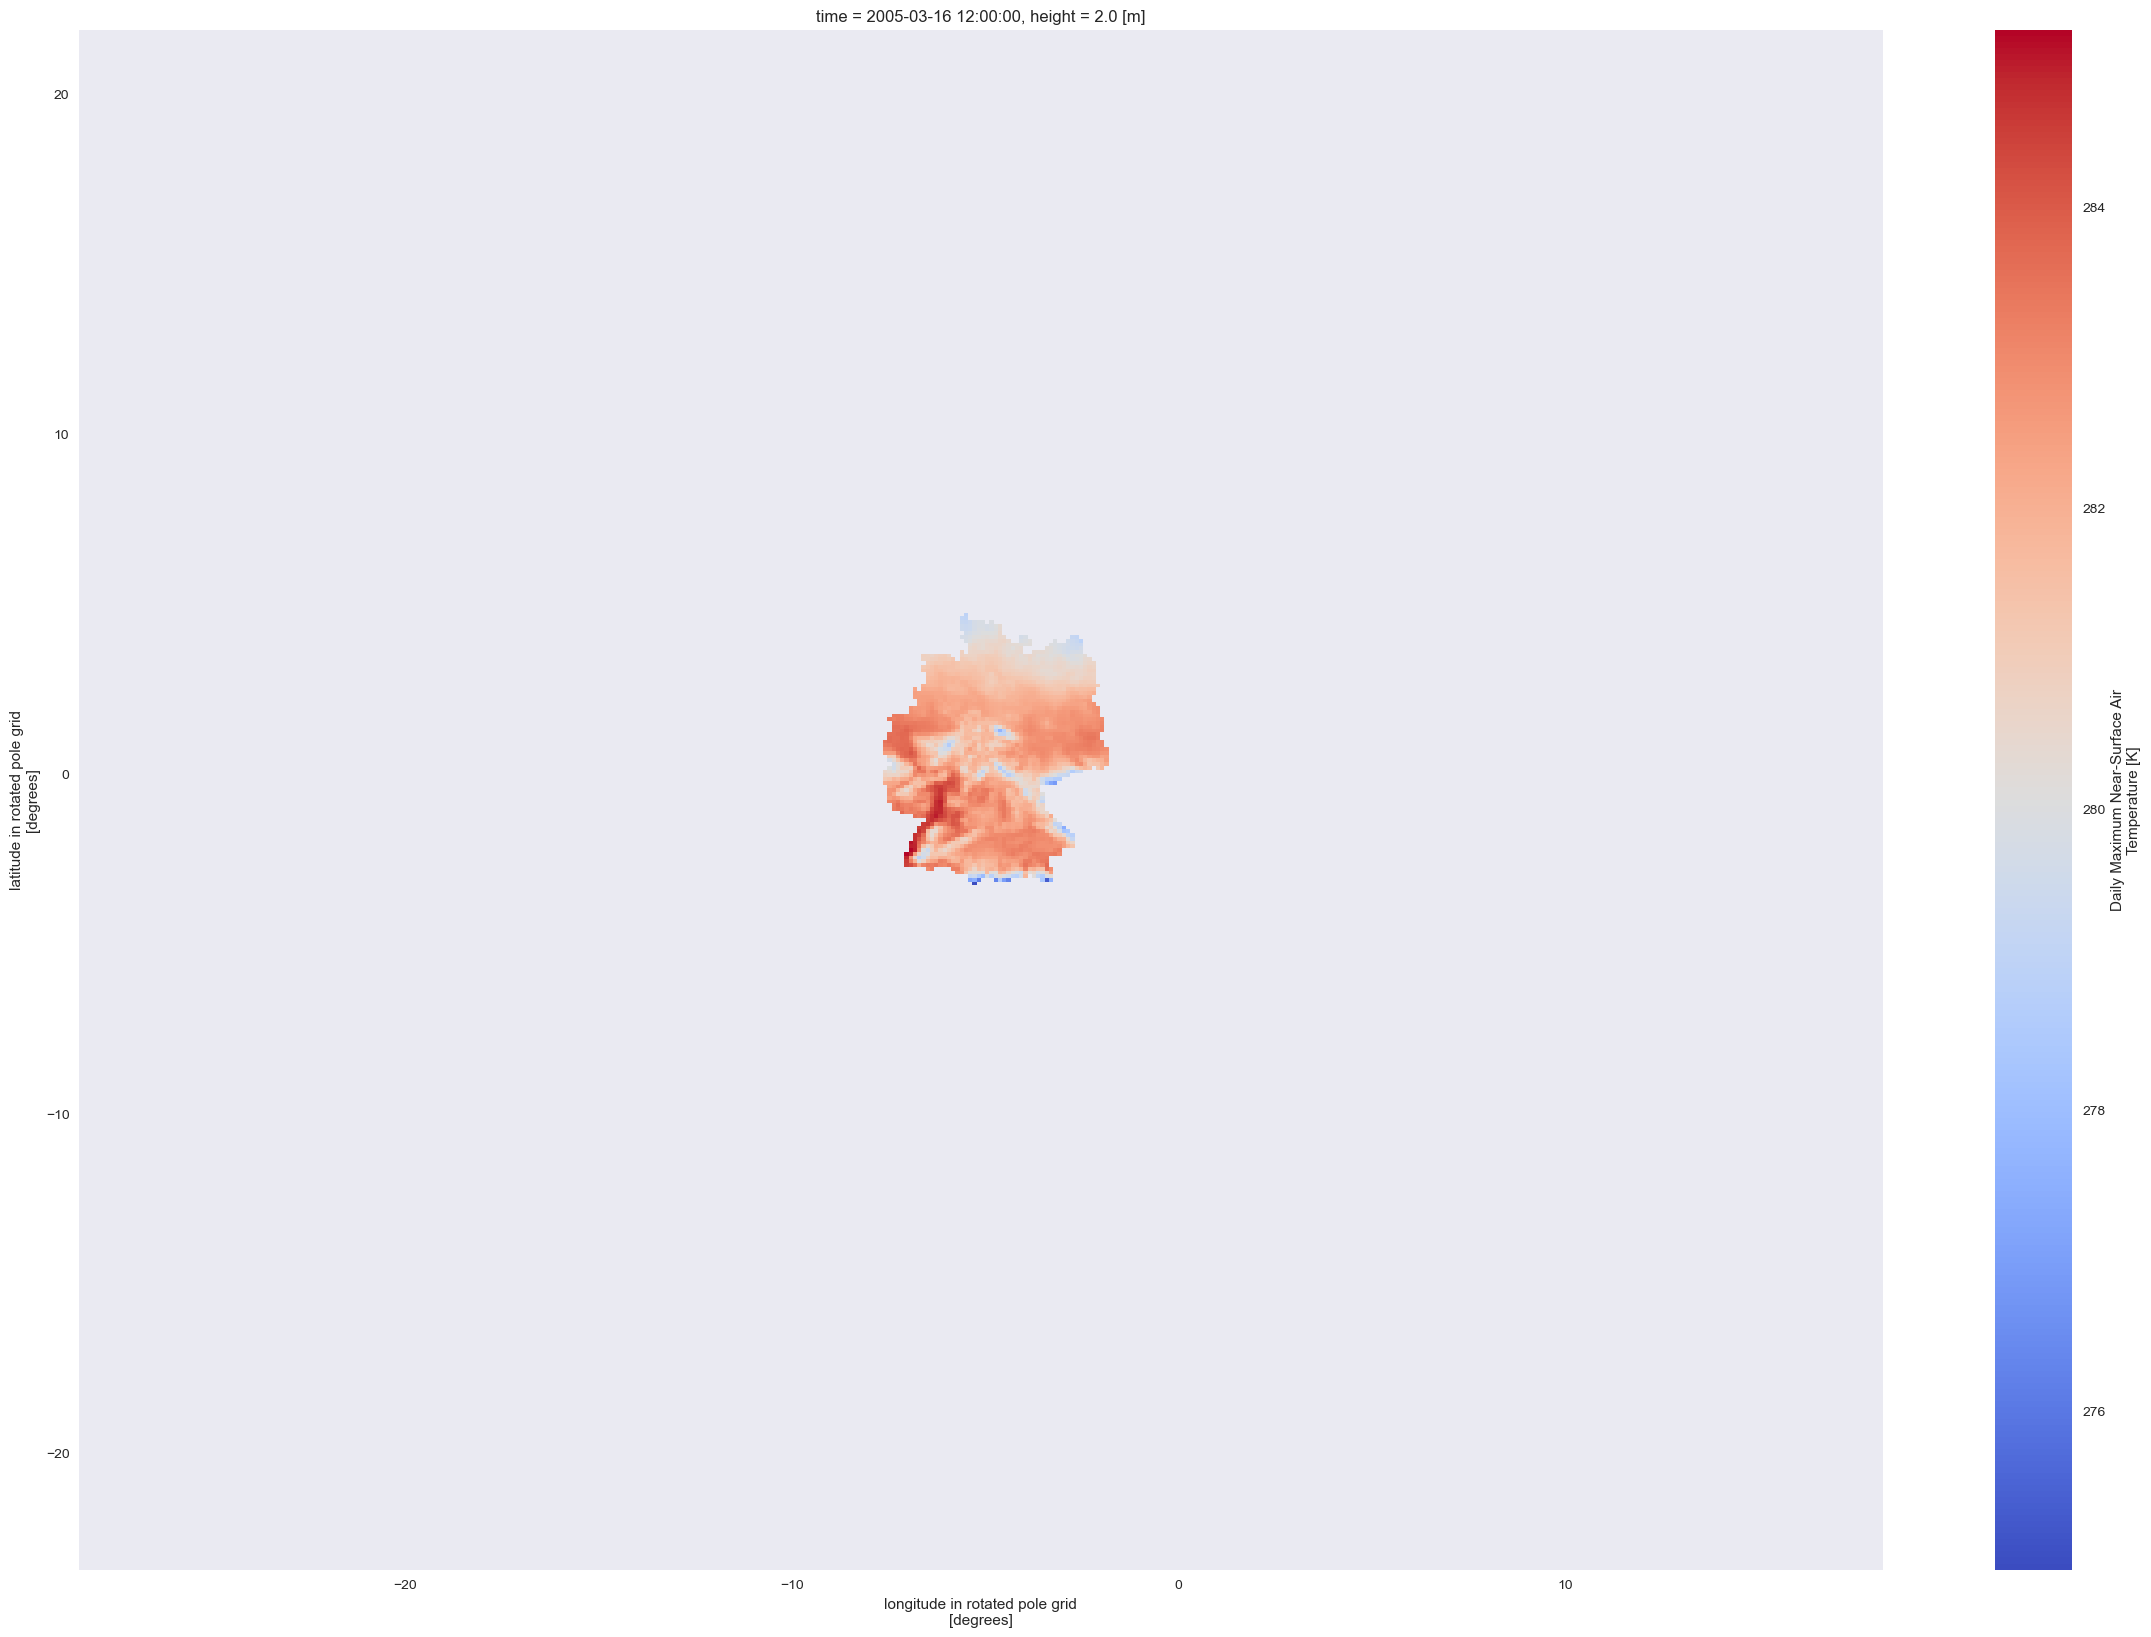

In [31]:
test_xr['tasmax'].sel(time=cftime.DatetimeProlepticGregorian(2005, 3, 16), method='nearest').plot(cmap = 'coolwarm', size=20)

Text(0, 0.5, 'K')

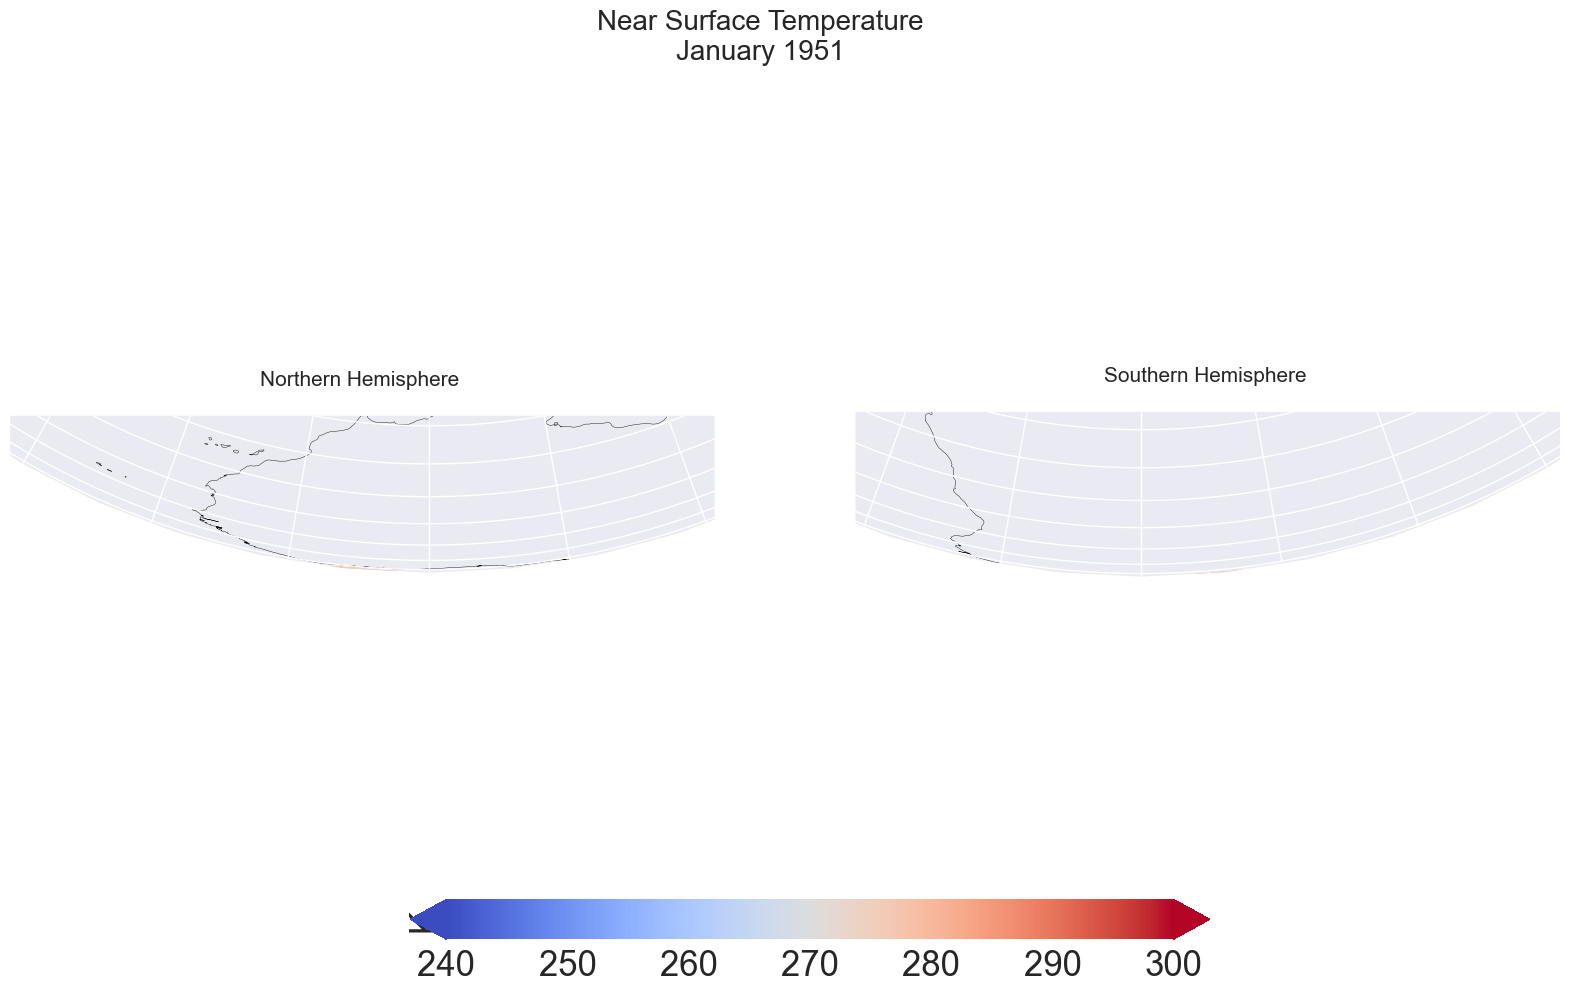

In [16]:
fig = plt.figure(1, figsize=[20,10])

# Fix extent
minval = 240
maxval = 300

# Plot 1 for Northern Hemisphere subplot argument (nrows, ncols, nplot)
# here 1 row, 2 columns and 1st plot
ax1 = plt.subplot(1, 2, 1, projection=ccrs.Orthographic(0, 90))

# Plot 2 for Southern Hemisphere
# 2nd plot 
ax2 = plt.subplot(1, 2, 2, projection=ccrs.Orthographic(180, -90))

tsel = 0
for ax,t in zip([ax1, ax2], ["Northern", "Southern"]):
    map = test_xr['tasmax'].isel(time=tsel).plot(ax=ax, vmin=minval, vmax=maxval, 
                                           transform=ccrs.PlateCarree(), 
                                           cmap='coolwarm', 
                                           add_colorbar=False)
    ax.set_title(t + " Hemisphere \n" , fontsize=15)
    ax.coastlines()
    ax.gridlines()

# Title for both plots
fig.suptitle('Near Surface Temperature\n' + test_xr.time.values[tsel].strftime("%B %Y"), fontsize=20)


cb_ax = fig.add_axes([0.325, 0.05, 0.4, 0.04])

cbar = plt.colorbar(map, cax=cb_ax, extend='both', orientation='horizontal', fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=25)
cbar.ax.set_ylabel('K', fontsize=25)


In [17]:
print(test_xr.lat.sel())

<xarray.DataArray 'lat' (rlat: 412, rlon: 424)>
[174688 values with dtype=float32]
Coordinates:
    lon      (rlat, rlon) float32 ...
    lat      (rlat, rlon) float32 ...
  * rlon     (rlon) float64 -28.38 -28.26 -28.16 -28.05 ... 17.93 18.05 18.16
  * rlat     (rlat) float64 -23.38 -23.26 -23.16 -23.05 ... 21.61 21.73 21.83
    height   float32 ...
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    bounds:         lat_bnds


In [18]:
a = test_xr['tasmax'].sel(time=cftime.DatetimeProlepticGregorian(2000, 7, 1), method='nearest').values
a = a[~np.isnan(a)]
print(a)

[286.00665 288.27332 288.49332 ... 291.08667 291.07333 290.94   ]


In [63]:
#Longitudes an denen der Wert der Termperatur ungleich 0 ist.
lons = test_xr.where(test_xr['tasmax']!=np.nan, drop =True).squeeze()

In [67]:
np.max(lons)

<bound method DatasetAggregations.max of <xarray.Dataset>
Dimensions:       (time: 660, bnds: 2, rlat: 412, rlon: 424, vertices: 4)
Coordinates:
  * time          (time) object 1951-01-16 12:00:00 ... 2005-12-16 12:00:00
    lon           (rlat, rlon) float32 -10.06 -9.964 -9.864 ... 64.76 64.96
    lat           (rlat, rlon) float32 21.99 22.03 22.07 ... 66.81 66.75 66.69
  * rlon          (rlon) float64 -28.38 -28.26 -28.16 ... 17.93 18.05 18.16
  * rlat          (rlat) float64 -23.38 -23.26 -23.16 ... 21.61 21.73 21.83
    height        float32 2.0
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds     (time, bnds, rlat, rlon) object 1951-01-01 00:00:00 ... 200...
    lon_bnds      (rlat, rlon, vertices, time) float32 -10.04 -10.04 ... 65.07
    lat_bnds      (rlat, rlon, vertices, time) float32 22.01 22.01 ... 66.73
    rotated_pole  (time, rlat, rlon) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    tasmax        (time, rlat, rlon) float32 nan nan nan nan 